# Download Images from Kaggle-->>

In [ ]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Images download done.')

Images download done.


# Import libraries
```



In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Images Category

In [ ]:

print(os.listdir(dataset))

['animals', 'images']


In [ ]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [ ]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [ ]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [ ]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

# Train Images

In [ ]:
import random

train_data = []


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])


The program prepares the training dataset by processing images from three categories: dogs, cats, and pandas. It begins by initializing an empty list called train_data, which will store the processed images along with their associated labels.

For each category, the program constructs the path to the image directory, retrieves all image file names, and shuffles them to introduce randomness. From this shuffled list, it selects the first 100 images to ensure a balanced and manageable dataset size.

Each selected image is then read, converted to grayscale to eliminate color information, and resized to a uniform 100x100 pixels. After processing, the image is paired with a numerical label representing its category and added to the train_data list. By the end, the dataset contains 300 images total 100 from each category ready for use in training the classification model.



In [ ]:
#the code shuffles the `train_data` list and then prints the labels of the first 10 images after the shuffle, showing the class labels of those images.
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[2, 0, 1, 2, 1, 0, 1, 0, 0, 1]


# Show the Images

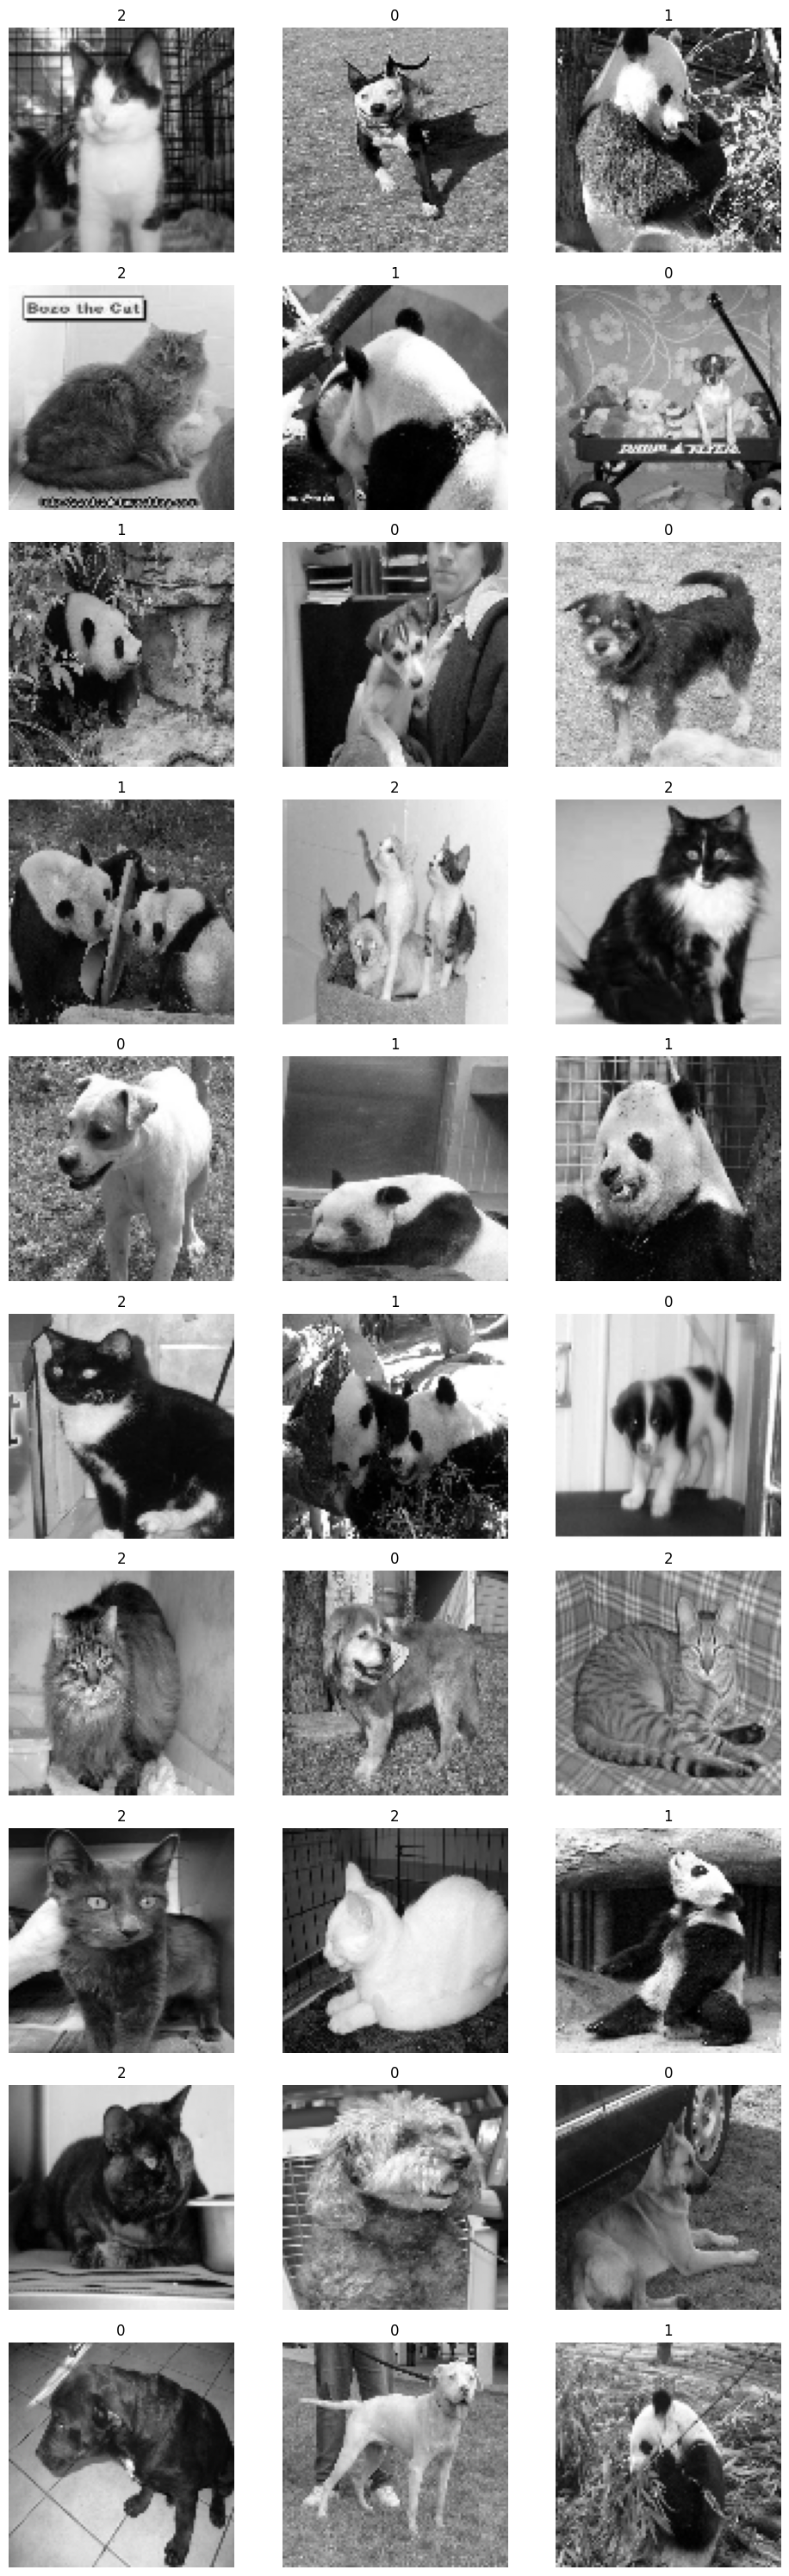

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(10, 30))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


This code uses Matplotlib to display a 3x3 grid of grayscale images from the dataset, each paired with its corresponding label, which indicates the animal type: 0 for dog, 1 for cat, and 2 for panda. The purpose is to visually inspect a sample of the training data and understand how the images are associated with their respective classes.

By iterating through the train_data, the code plots each image in a subplot, using ax.set_title(label) to assign the label as the title above each image. The images are shown in their raw grayscale format, providing a clear view without any color transformation. This kind of visualization is helpful in understanding the dataset’s structure and ensuring the labels align correctly with the visual content.

Such image-label visualization is a common practice in early stages of model development, helping developers verify data integrity and get an intuitive sense of what the model will be learning from.



Separate Images

In [ ]:
#the train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)


5

In [ ]:
# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold


Fold 1:
Labels: [2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2]
Fold 2:
Labels: [0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2]
Fold 3:
Labels: [1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1]
Fold 4:
Labels: [2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2]
Fold 5:
Labels: [1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0]


In [ ]:
def l2_distance(valid_img, train_img):
    # Calculate the element-wise difference between the two images
    difference = valid_img - train_img

    # Square each of the differences to eliminate negative signs
    squared_difference = np.square(difference)

    # Sum up all the squared differences to get a total
    summed_squares = np.sum(squared_difference)

    # Take the square root of the sum of squared differences to compute the Euclidean distance
    distance = np.sqrt(summed_squares)

    # Return the Euclidean distance
    return distance


def l1_distance(valid_img, train_img):
    # Calculate the element-wise absolute difference between the two images
    difference = np.abs(valid_img - train_img)

    # Sum up all the absolute differences to get the Manhattan distance
    distance = np.sum(difference)

    # Return the Manhattan distance
    return distance


In [ ]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label




Accuracy calculate

> Add blockquote



In [ ]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")



K = 1:
  Average Accuracy: 0.44

K = 2:
  Average Accuracy: 0.44

K = 3:
  Average Accuracy: 0.46

K = 4:
  Average Accuracy: 0.48

K = 5:
  Average Accuracy: 0.49

K = 6:
  Average Accuracy: 0.50

K = 7:
  Average Accuracy: 0.51

K = 8:
  Average Accuracy: 0.50

K = 9:
  Average Accuracy: 0.54

K = 10:
  Average Accuracy: 0.53

K = 11:
  Average Accuracy: 0.54

K = 12:
  Average Accuracy: 0.55

K = 13:
  Average Accuracy: 0.56

K = 14:
  Average Accuracy: 0.56

K = 15:
  Average Accuracy: 0.56

K = 16:
  Average Accuracy: 0.52

K = 17:
  Average Accuracy: 0.53

K = 18:
  Average Accuracy: 0.53

K = 19:
  Average Accuracy: 0.54

K = 20:
  Average Accuracy: 0.54

K = 21:
  Average Accuracy: 0.53

K = 22:
  Average Accuracy: 0.50

K = 23:
  Average Accuracy: 0.51

K = 24:
  Average Accuracy: 0.52

K = 25:
  Average Accuracy: 0.53

K = 26:
  Average Accuracy: 0.52

K = 27:
  Average Accuracy: 0.54

K = 28:
  Average Accuracy: 0.52

K = 29:
  Average Accuracy: 0.54

K = 30:
  Average Accu

In [ ]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.40

K = 2:
  Average Accuracy: 0.40

K = 3:
  Average Accuracy: 0.38

K = 4:
  Average Accuracy: 0.37

K = 5:
  Average Accuracy: 0.39

K = 6:
  Average Accuracy: 0.35

K = 7:
  Average Accuracy: 0.38

K = 8:
  Average Accuracy: 0.37

K = 9:
  Average Accuracy: 0.39

K = 10:
  Average Accuracy: 0.40

K = 11:
  Average Accuracy: 0.35

K = 12:
  Average Accuracy: 0.34

K = 13:
  Average Accuracy: 0.37

K = 14:
  Average Accuracy: 0.36

K = 15:
  Average Accuracy: 0.36

K = 16:
  Average Accuracy: 0.36

K = 17:
  Average Accuracy: 0.36

K = 18:
  Average Accuracy: 0.34

K = 19:
  Average Accuracy: 0.35

K = 20:
  Average Accuracy: 0.36

K = 21:
  Average Accuracy: 0.36

K = 22:
  Average Accuracy: 0.36

K = 23:
  Average Accuracy: 0.37

K = 24:
  Average Accuracy: 0.38

K = 25:
  Average Accuracy: 0.38

K = 26:
  Average Accuracy: 0.36

K = 27:
  Average Accuracy: 0.35

K = 28:
  Average Accuracy: 0.34

K = 29:
  Average Accuracy: 0.37

K = 30:
  Average Accu

# Show the graph

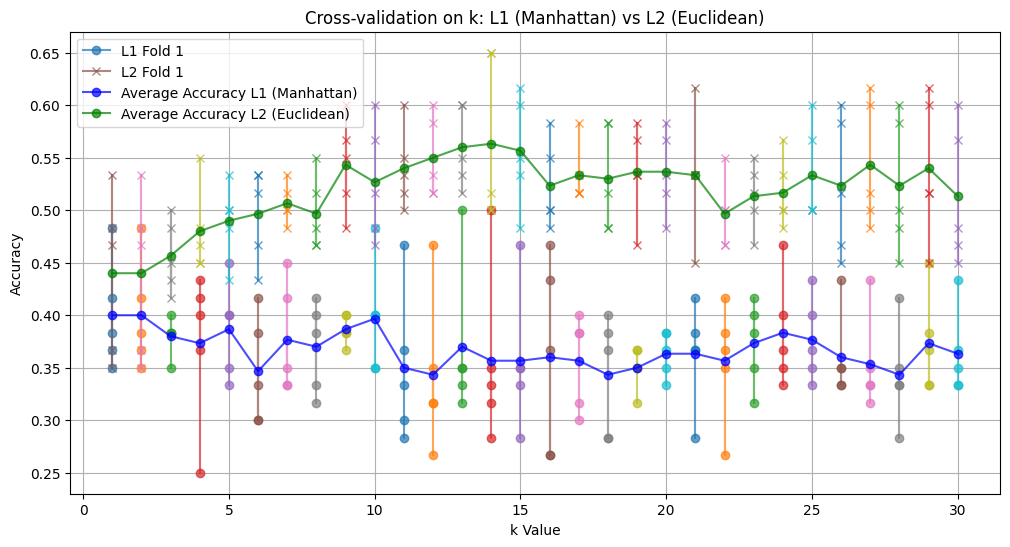

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


The graph demonstrates how the accuracy of the k-NN algorithm changes with different values of k, comparing the use of Manhattan (L1) and Euclidean (L2) distance metrics. This comparison helps evaluate which distance function offers better predictive performance and consistency across multiple data folds.

Performance Trends: The accuracy for both distance metrics varies with each k value, revealing how sensitive the model is to the choice of k. Some k values consistently lead to stronger performance, highlighting points where the model achieves a better balance between underfitting and overfitting.

Peak Accuracy Zones: For the Euclidean distance, a clear improvement in average accuracy is seen as k increases, with the best results observed around k = 13 to 17. This suggests that in this range, the model is better able to capture useful patterns without being too sensitive to noise. The Manhattan distance does not show the same steady trend, and its average accuracy remains comparatively lower.

Consistency and Reliability: The error bars across k values indicate the variation in accuracy across the 5-fold cross-validation. Euclidean distance generally shows smaller error margins, pointing to greater reliability and repeatability. In contrast, the Manhattan approach tends to have larger variability, indicating that its performance is more influenced by how the data is split.

Impact of Distance Metric: Although both distance metrics are valid, Euclidean distance consistently delivers higher and more stable accuracy. It adapts better across different k values and appears less affected by fluctuations in the training data. The Manhattan distance, while occasionally effective at specific k values, does not provide the same level of consistency or peak performance.

In conclusion, this graph reinforces the advantage of using Euclidean distance for k-NN in this dataset, particularly for mid-range k values. It provides not only better accuracy but also more dependable results across different validation folds.